# Comparative Analysis of Option Pricing: Binomial Tree Model vs. Black-Scholes-Merton Model


In [1]:
from scipy.stats import norm
from math import log, sqrt, exp
import numpy as np
import BinomialTree as bt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Using the binomial tree method to compute call option prices for up to 10K time steps. 

In [4]:
S_0, K, r, sigma, T = 10, 10, 0.02, 0.25, 0.25
N_values = [10, 100, 1000, 10000]
binomial_prices = {}
for N in N_values:
    tree = bt.BinomialTree(S_0=S_0, T=T, K=K, r=r, N=N, sigma=sigma)
    
    price = tree.option_price('call')
    binomial_prices[N] = price
bs_prices = {}
bs_price = bt.black_scholes_call_price(S_0, K, T, r, sigma)
for N in N_values:
    bs_prices[N] = round(bs_price, 4)


# Comparing Prices

In [5]:
errors = {}
for N in N_values:
    error = abs(binomial_prices[N] - bs_price)
    errors[N] = error
print(f"\n{'Number of Timesteps':<25} | {'Binomial Tree Solution':<25} | {'Black Scholes Solutions':<25} {'|E|':<25}")
for N in N_values:
    print(f"N = {N:<20d}  ${binomial_prices[N]:<22.6f}      ${bs_prices[N]}        ${errors[N]:<22.6f}")


Number of Timesteps       | Binomial Tree Solution    | Black Scholes Solutions   |E|                      
N = 10                    $0.510200                    $0.5224        $0.012245              
N = 100                   $0.521200                    $0.5224        $0.001245              
N = 1000                  $0.522300                    $0.5224        $0.000145              
N = 10000                 $0.522400                    $0.5224        $0.000045              


# Plotting The Difference

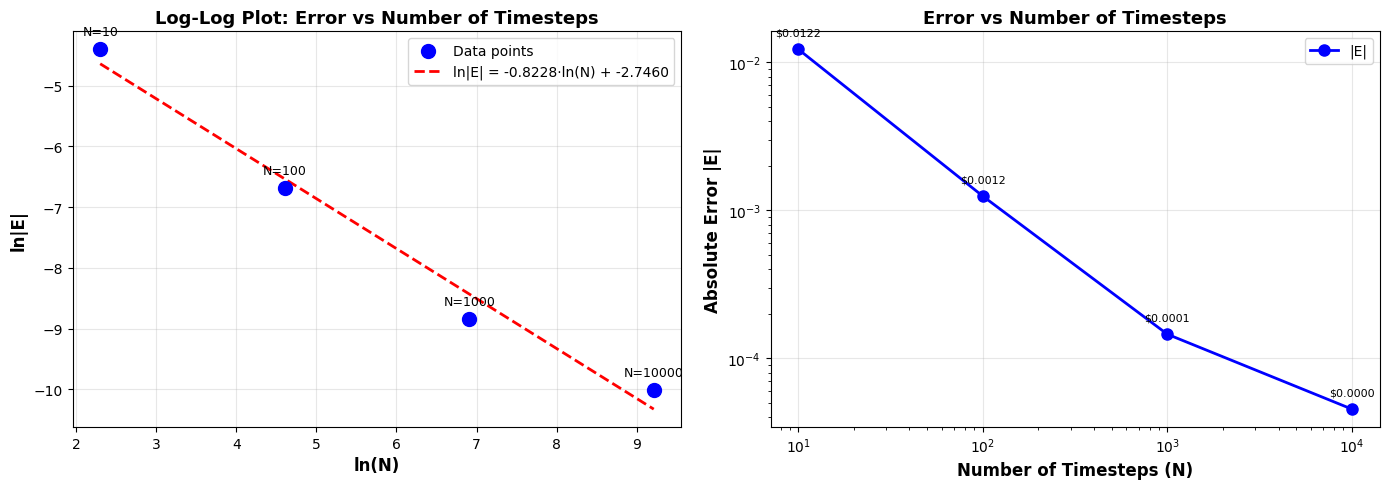

In [ ]:
ln_N = np.log(N_values)
ln_E = np.log([errors[N] for N in N_values])

# linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(ln_N, ln_E)
convergence_rate = -slope

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.scatter(ln_N, ln_E, s=100, color='blue', label='Data points', zorder=3)
ax1.plot(ln_N, slope * ln_N + intercept, 'r--', linewidth=2, 
         label=f'ln|E| = {slope:.4f}·ln(N) + {intercept:.4f}', zorder=2)
ax1.set_xlabel('ln(N)', fontsize=12, fontweight='bold')
ax1.set_ylabel('ln|E|', fontsize=12, fontweight='bold')
ax1.set_title('Log-Log Plot: Error vs Number of Timesteps', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# data labels
for i, (x, y) in enumerate(zip(ln_N, ln_E)):
    ax1.annotate(f'N={N_values[i]}', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# error vs N on regular scale
ax2.plot(N_values, [errors[N] for N in N_values], 'bo-', linewidth=2, 
         markersize=8, label='|E|')
ax2.set_xlabel('Number of Timesteps (N)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Absolute Error |E|', fontsize=12, fontweight='bold')
ax2.set_title('Error vs Number of Timesteps', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=10)

for N in N_values:
    ax2.annotate(f'${errors[N]:.4f}', (N, errors[N]), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# Convergence Rate

In [13]:
print(f"\nEstimated Convergence Rate of: {convergence_rate:.4f}")
print(f"Means, as N doubles, the error |E| decreases by a factor of approximately: "f"{2**convergence_rate:.4f}")


Estimated Convergence Rate of: 0.8228
Means, as N doubles, the error |E| decreases by a factor of approximately: 1.7688
